# Introduction to Longitudinal Tracking

S. Albright, F. Batsch, K. Iliakis, A. Lasheen, G. Papotti, D. Quartullo, H. Timko

L. Intelisano, B. Karlsen-Baeck, I. Karpov, O. Naumenko, A. Vanel, M. Zampetakis


## Links

- RF CAS website: https://indico.cern.ch/event/1212689/
- Programme of the CAS: https://cas.web.cern.ch/sites/default/files/RF_timetable_2023_v3_1.pdf
- Longitudinal hands-on, link to content and cheat sheets: https://indico.cern.ch/event/1212689/contributions/5377007/
- Python software installation: https://codimd.web.cern.ch/s/eg2t11z3T
- BLonD source code: https://gitlab.cern.ch/blond/BLonD


## Introduction

In this hands-on session, we will experiment with tracking of particles to describe their longitudinal motion and acceleration in a synchrotron.

The theme of the hands-on session will be using the Super Proton Synchrotron (SPS) as injector for FCC-hh ([FCC-hh Conceptual Design Report](http://cds.cern.ch/record/2651300/files/CERN-ACC-2018-0058.pdf), Section 6, p.940). The proposal is to turn the SPS into a superconducting accelerator (scSPS) and increasing the maximum energy to 1.3 TeV.

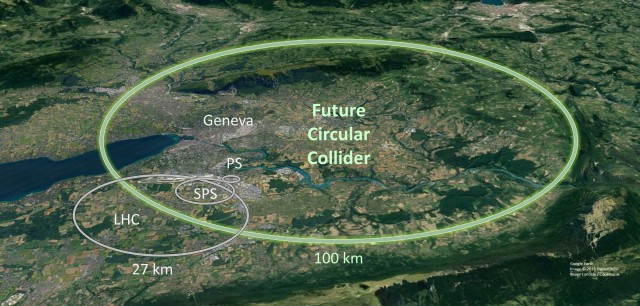

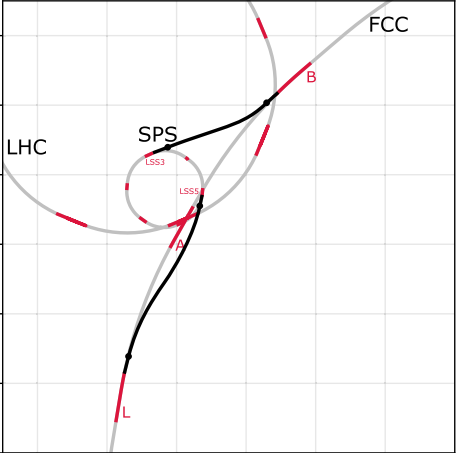

## The synchrotron parameters

### Parameters of the Super Proton Synchrotron (SPS) at CERN

| Parameter                        |                                                                                                                                |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| Energy range                     | $E_\mathrm{kin} = 26\,\mathrm{GeV}...1300\,\mathrm{GeV}$                                                                       |
| Circumference                    | $2 \pi R = 6911.5\,\mathrm{m}$                                                                                                 |
| Bending radius                   | $\rho = 741.3\,\mathrm{m}$                                                                                                     |
| Transition gamma                 | $\gamma_\mathrm{tr} = 18.$                                                                                                     |
| Acceleration time                | $4\,\mathrm{s}$                                                                                                                |
| Harmonic number                  | $4620$                                                                                                                         |
| Maximum RF voltage               | $V_{\mathrm{rf}} = 15\,\mathrm{MV}$                                                                                            |
| Longitudinal emittance per bunch | $\varepsilon_\mathrm{l} = 0.6\,\mathrm{eVs}$                                                                                   |
| Maximum bucket filling factor    | $\varepsilon_\mathrm{l}/A_\mathrm{bucket} = 0.8$                                                                               |
| Total beam intensity             | $N = 1.6 \cdot 10^{14} \,\mathrm{protons}$ $(2 \times 320\mathrm{b} \times 2.5 \cdot 10^{11} \mathrm{protons}/\mathrm{bunch})$ |



### Import base modules

In [ ]:
# In this cell we import all modules that will be required for the computation
# You can add extra imports as you progress in the exercises
# scipy.constants provides the elementary charge, speed of light, mass of a proton...

import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import e, c, m_p


### Enter machine parameters

In [ ]:
# scSPS parameters
# Replace the ... with the correct value!

circumference = ...     # [m]
momentum = ...          # [eV/c]
charge = ...            # [e]
mass_energy = ...       # [eV/c^2]
gamma_tr = ...          # []

harmonic = ...          # []
voltage = ...           # [V]


## Tracking using BLonD

In this notebook, you will use the BLonD tracking code to simulate the dynamics of a bunch in the SPS. This part will serve as a basis for more complex simulations tomorrow.

At each stage, the syntax to create objects can be checked by calling `function?`. Some extra `support_functions` will be suggested. These were designed to help you during the hands-on session by reducing the coding overhead. You can also check their documentation of each function by calling `function?` in a new cell.

The available support functions are

| `support_functions.py`        |
| ----------------------------- |
| plot_phase_space_trajectory   |
| plot_phase_space_distribution |
| synchrotron_tune              |
| separatrix                    |
| run_animation                 |


### First importing the necesary modules

In [ ]:
# Make sure the latest BLonD version is installed
!pip install --upgrade blond


In [ ]:
# Verify proper installation
import blond
blond.test()


In [ ]:
from blond.input_parameters.ring import Ring
from blond.input_parameters.rf_parameters import RFStation
from blond.beam.beam import Proton, Beam
from blond.beam.distributions import parabolic, bigaussian
from blond.beam.profile import Profile, CutOptions, FitOptions
from blond.trackers.tracker import RingAndRFTracker, FullRingAndRF
from blond.plots.plot import Plot
from blond.monitors.monitors import BunchMonitor
from support_functions import plot_phase_space_trajectory, plot_phase_space_distribution


## Exercise 1: Setting-up the BLonD input objects

#### In the cells below, you will create a *Ring* object, which represents the drift space, and an *RFStation* object, which represents the RF cavities.  You will also see some of the parameters they provide.

1. Create a Ring with a single section
    - The `Ring` object requires:
        - ring_length:  The length of the accelerator in meters
        - alpha_0:  The momentum compaction factor of the accelerator
        - synchronous_data:  The momentum program (a single value is enough for now)
        - Particle:  An object containing particle parameters
    - *Hint: the Particle parameters can be passed with `Proton()`*
    - *Hint: you'll need to compute the momentum compaction factor $\alpha_0$ from $\gamma_{tr}$*
    - *Hint: you can set n_turns = (..) to change the number of turns in the simulation*
2. Create an RF station
    - The `RFStation` object requires:
        - Ring: The newly created `Ring` object
        - harmonic:  The harmonic number of the RF cavities
        - voltage:  The voltage of the RF cavities
        - phi_rf_d:  The initial phase of the RF wave (Use `0` if you're unsure)
    - *Hint: by default the RFStation will be located at the end of the first Ring section*
    - *Hint: you'll need to specify the RF phase, try a value a keep it in mind for later*

In [ ]:
Ring?


In [ ]:
RFStation?


In [ ]:
ring = Ring(...)

In [ ]:
rf_station = RFStation(...)

In [ ]:
# Get the calculated parameters at a given turn, for a given ring section
# Some are done for you, try printing the relativistic factor (beta),
# Lorentz factor (gamma), phase slip factor (eta)
# Hint: type "ring." and then press tab to check the content

idx_section = 0
idx_turn = 0

print('The total energy [eV/c]: ', ring.energy[idx_section, idx_turn])
print('The kinetic energy [eV/c]: ', ring.kin_energy[idx_section, idx_turn])
print('The revolution period [s]: ', ring.t_rev[idx_turn])

In [ ]:
# Get the calculated parameters at a given turn, for a given rf harmonic
# The RF station is located after a ring section
# Some are done for you, try printing the RF voltage, and frequency
# Hint: type "rf_station." and then press tab to check the content

idx_rf = 0
idx_turn = 0

print('The RF harmonic number: ', rf_station.harmonic[idx_rf, idx_turn])
print('The RF period [s]: ', rf_station.t_rf[idx_rf, idx_turn])
print('The synchrotron frequency [Hz]: ',
      rf_station.omega_s0[idx_turn] / (2 * np.pi))
print('The synchrotron tune: ', rf_station.Q_s[idx_turn])


## Exercise 2: Setting-up the BLonD tracking objects

#### In this exercise, you will create all the objects needed to track one or more particles

1. Create new `Ring` and `RFStation` objects as in Exercise 1.  New versions of all objects are needed for each exercise so that internal counters are reset to 0.
2. Create a Beam object
    - The `Beam` object requires:
        - Ring:  A `Ring` object
        - n_macroparticles:  The number of particles used in tracking (start with 1)
        - intensity:  The total number of particles in the ring (0 for now)
3. Place the single macroparticle where you expect the center of the RF bucket to be
    - The particle positions are stored as an array `n_macroparticles` long
        - `beam.dt[0] = 2E-9` will set the time of the first particle to 2 ns
        - `beam.dE[0] = 1E6` will set the energy of the first particle to 1 MeV
    - *Hint: this will depend on the `phase` parameter you chose above, if you used `phase = 0`, the center of the bucket is at ~2.5 ns*
4. Create a RingAndRFTracker object
    - The `RingAndRFTracker` object requires:
        - RFStation:  An `RFStation` object
        - Beam:  A `Beam` object
5. Create a FullRingAndRF object
    - The `FullRingAndRF` object requires:
        - RingAndRFSection_list:  A list of `RingAndRFTracker` objects.  With only one `RFStation`, this is a list of one element: `[rf_tracker]`
    - `FullRingAndRF` has a `track()` function.  Every time it is called, one turn of the accelerator is calculated.

In [ ]:
Beam?


In [ ]:
beam = Beam(...)

In [ ]:
RingAndRFTracker?


In [ ]:
rf_tracker = RingAndRFTracker(...)

In [ ]:
FullRingAndRF?


In [ ]:
full_tracker = FullRingAndRF(...)

In [ ]:
# Run me!
# See the particle time and energy change every time track() is called:
print(beam.dt, beam.dE)
full_tracker.track()
print(beam.dt, beam.dE)

## Exercise 3: Tracking a single particle

#### In this exercise, you will track a single particle and see how it moves in phase space

1. Create new `Ring`, `RFStation`, `Beam`, `RingAndRFTracker` and `FullRingAndRF` objects as in Exercise 2.
2. Write a `for` loop to iterate over the number of turns and track the particle
    - Your loop should be creted with `for i in range(number_of_turns):`
    - Inside the loop use the `track()` function of `FullRingAndRF` to track every turn
    - *Hint: You will need to iterate over `ring.n_turns`*
    - *Advise: create a cell where all `Ring`, `RFStation`, `Beam`, `RingAndRFTracker`, `FullRingAndRF` are re-created. An internal counter must be reset to 0 whenevery the tracking is done.*
3. Simulate the evolution of the particle coordintates for few hundred turns and store the coordinates.
   - *You can pre-allocate a numpy array with `np.zeros(ring.n_turns)` and fill the particle coordinates each turn*
4. Plot the evolution of the particle phase and energy vs. turn number, and the particle motion in longitudinal phase space
    - *You can make your own plot with `matplotlib` if you know how*
    - *The support function `plot_phase_space_trajectory` can be used if you need help plotting*

In [ ]:
plot_phase_space_trajectory?


## Exercise 4: Tracking a few particles

#### In this exercise, you will track several particles to see how they move in phase space

1. Repeat the same operations as in Exercise 3, this time with several particles
    - *You can generate numpy arrays representing several particles as `np.array([phase_1, phase_2, phase_3])`*
    - *You can store the trajectories of the particles in a pre-allocated array of size `np.zeros((n_turns, n_particles))`*
2. Track the evolution of particles including with large offsets in `dt` and `dE`
    - Large `dt` means more than the bucket length (`t_rf`)
    - Large `dE` means more than the bucket height (a few MeV)
    - *What happens when particles are too far from the synchronous particle?*
3. Generate about 10 particles at $\Delta E=0$ with different time coordinates, and simulate for a few turns
    - *You can use `np.linspace(dt_start, dt_end, n_particles)` to linearly space particles in time*
    - *What can you observe regarding the velocity of the particles in phase space, vs. the maximum amplitude in time?*
4. Change the $\Delta E$ of the particles until no stable motion is found anymore, indicating the edge of the RF bucket.
   

## Exercise 5: Tracking a bunch
   
#### In this exercise, you will create a realistic distribution and observe it's motion in phase space
   
1. Generate a bunch distribution using the `parabolic` or `bigaussian` function.
    - *Use the `plot_phase_space_distribution` to plot the distribution in phase space*
    - *Use your tracking routine to see the bunch distribution before/after tracking*
    - *Use the `Plot` object from `BLonD` to save figures during the tracking loop (with `plots.track()`). You can enable the `show_plots` option to have the plots displayed in the notebook rather than saved on disk.*
2. By default, `parabolic` or `bigaussian` functions will adjust the bunch phase and energy spread to adapt it to the RF bucket if the `bunch_position` and `energy_spread` options are not passed. Try to mismatch the bunch to the bucket. Track it for many synchrotron periods.
3. Introduce a phase or energy error between bunch and bucket by changing `bunch_position` or `bunch_energy`.
4. Introduce a mismatch in the energy spread by changing `energy_spread` for a fixed RF voltage. What do you observe? How would you correct this in operation?

In [ ]:
parabolic?


In [ ]:
plot_phase_space_distribution?


In [ ]:
Plot?


## Exercise 6: Acceleration

#### In this exercise, you will accelerate a bunch to see the effect it has on the beam dynamics

1. Include acceleration in the simulation
    - *This can be done by modifying the input to the `Ring` object*
    - *A program can be passed by using the syntax `((time_start, time_end), (momentum_start, momentum_end))`*
    - *This will make a linear ramp between `momentum_start` and `momentum_end`*
2. Play with the momentum program you generated and the RF voltage to see the impact of slow/fast acceleration on the RF bucket area.
3. Mismatch the bunch like in Exercise 4 to observe the filamentation and/or lost particles during acceleration.

## Exercise 7: Getting the bunch parameters from the longitudinal profile

#### In this exercise, you will see how to calculate the longitudinal profile and how it changes based on input parameters

1. Use the `Profile` object to obtain the longitudinal profile
    - *You can add the `profile.track()` routine in the `for` loop to update the profile every turn*
2. Plot the bunch profile by using the `Plot` object provided in `BLonD`, passing the `profile`.
    - *You can also use `matplotlib` on the `(profile.bin_centers, profile.n_macroparticles)` parameters*
3. Use the `CutOptions` object to control the parameters of the histogram generating the bunch profile.
    - *Vary the window to cover one (several) RF bucket(s)*
    - *Vary the number of slices (bins)*
    - *NB: the plots are automatically going to account for the changes in `CutOptions`*
4. Use the `FitOptions` to fit the bunch parameters during tracking and save in an array the fitted parameters.

In [ ]:
Profile?


In [ ]:
CutOptions?


In [ ]:
FitOptions?


## Exercise 8: Analysing and saving the bunch parameters

#### In this exercise, you will observe statistics about the bunch distribution during the cycle

1. Use the `BunchMonitor` to automatically save the data in `h5` format.
2. Add the created `BunchMonitor` to the `Plot` object for the bunch length, position, etc. to be automatically plotted during the tracking.
2. Observe the bunch parameter evolutions like bunch length, bunch position, center of mass, applying comparable mismatches as in Exercises 4-5.
    


In [ ]:
BunchMonitor?
